## Historical Simulation Method
#### Point and Path Estimation

#### Import Libaries

In [80]:
import pandas as pd
import numpy as np
import random as rd
import yfinance as yf
from datetime import datetime as dt, date, timedelta
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [122]:
class Returns:

    def __init__(self, data):
        self.data = data

    def AbsoluteReturns(self):
        return self.data.diff().iloc[1:]

    def DiscreteProptionalReturns(self):
        return self.data.pct_change().iloc[1:]
    
    def ContinuousProtionalReturns(self):
        return np.log(self.data/self.data.shift().iloc[1:])

In [81]:
spotData = yf.download(tickers='^NSEI',start=date(2021, 1, 1), end=date.today(),auto_adjust=False,multi_level_index=False)['Adj Close']
spotPrice = spotData.tail(1).values[0]
spotReturns = np.array(spotData.pct_change().iloc[1:].values)

print(spotPrice)
print(len(spotReturns),spotReturns)

[*********************100%***********************]  1 of 1 completed

25112.400390625
1102 [ 0.00816067  0.00471238 -0.00375013 ... -0.00166374 -0.00075773
  0.01287247]


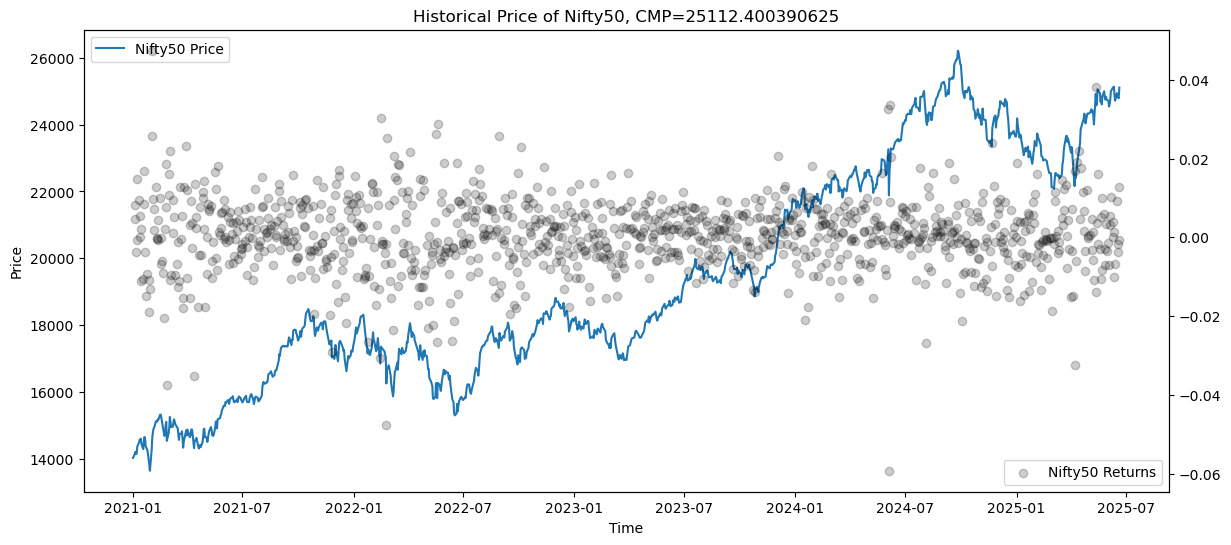

In [82]:
plt.figure(figsize=(14,6))
plt.plot(spotData, label='Nifty50 Price')
plt.title(f'Historical Price of Nifty50, CMP={spotPrice}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')

plt.twinx()
plt.scatter(x=spotData.iloc[1:].index, y= spotReturns, color='k', alpha=0.2, label='Nifty50 Returns')
plt.legend(loc='lower right')
plt.show()

In [83]:
print(np.random.choice(spotReturns))

0.0023946791656728195


In [84]:
print(rd.choice(spotReturns))

0.004005448710087123


In [85]:
print(spotPrice + (1+np.random.choice(spotReturns)))

25113.39094918139


In [86]:
simulatuions = 10000
sampleReturns = np.random.choice(spotReturns, size = simulatuions)
print(len(sampleReturns), sampleReturns)

10000 [-0.00624699  0.00095032  0.00942671 ...  0.00253344 -0.00101675
 -0.00251565]


### Point Estimation

In [88]:
simulatedPrices = np.array([spotPrice * ( 1 + ret) for ret in sampleReturns])
print(len(simulatedPrices),simulatedPrices)

10000 [24955.52358711 25136.26517247 25349.12771126 ... 25176.02121575
 25086.86730296 25049.22644084]


In [89]:
print('Price Estimate:',simulatedPrices.mean())

Price Estimate: 25130.092730516495


In [90]:
print('Expected Return:',((simulatedPrices.mean()-spotPrice)/spotPrice))

Expected Return: 0.0007045260355955457


### Path Estimation

In [92]:
simulatedPath = [spotPrice]

for t in range(252):
    simulatedPrice = simulatedPath[t]*(1+np.random.choice(spotReturns))
    simulatedPath.append(simulatedPrice)   

print(len(simulatedPath),simulatedPath)

253 [25112.400390625, 25148.60884748265, 25269.303676644176, 25493.052457295114, 25103.50935841516, 25288.749367776367, 25207.75944246233, 25378.4466253336, 25326.04120229688, 25078.260594248157, 25364.817154294804, 25885.808760312113, 25919.20464540984, 25725.375762148567, 25825.429142650883, 26138.653089619726, 26179.16805314271, 25730.0466958097, 25827.301941976784, 25866.22982385932, 25965.5909434445, 25783.890881927095, 25689.287267923402, 25728.315213724592, 25636.426628694004, 25775.00989038077, 25748.822100944864, 25572.050106865772, 25609.048718674752, 25800.142343799354, 25959.347079079762, 25765.2180028459, 25797.33770531731, 25524.952641877222, 25580.78241478178, 25563.92333815108, 25528.70333114364, 25259.15468407672, 25157.290704780535, 25204.996290446274, 24794.95078336228, 24828.272942210177, 24676.070633843934, 24548.756115310156, 24743.05180428407, 24969.633274519285, 25029.031567422688, 25043.539228286994, 25136.200544022133, 25369.58633976218, 25656.72413075134, 258

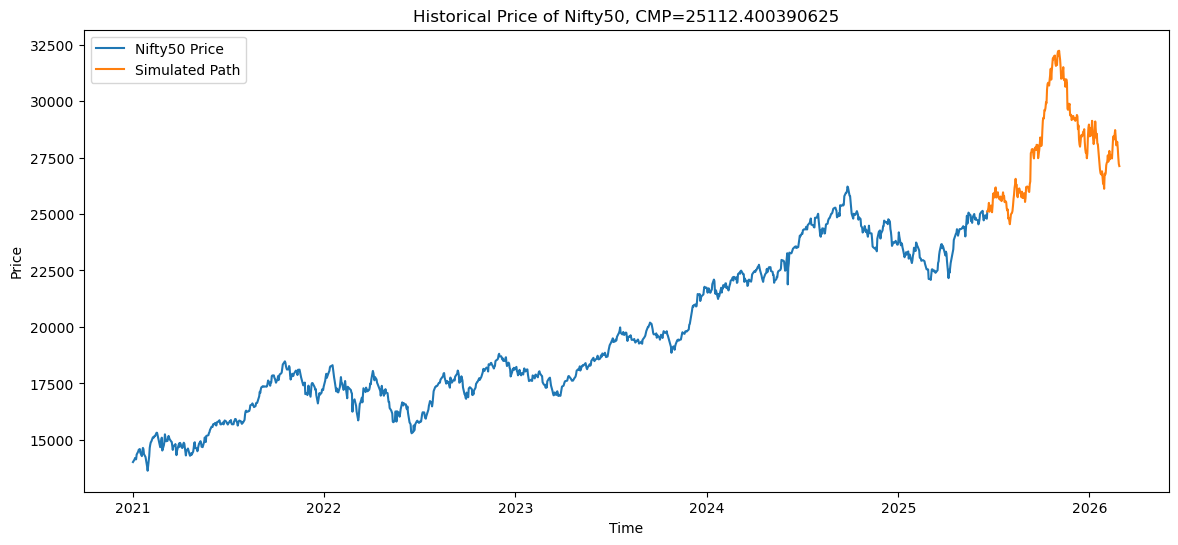

In [93]:
plt.figure(figsize=(14,6))
plt.plot(spotData, label='Nifty50 Price')

plt.plot([spotData.tail(1).index[0]+timedelta(t) for t in range(253)], simulatedPath, label='Simulated Path')

plt.title(f'Historical Price of Nifty50, CMP={spotPrice}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [94]:
simulatedPath = [spotPrice]

for t in range(252):
    simulatedPrice = simulatedPath[t]*(1+np.random.choice(spotReturns))
    simulatedPath.append(simulatedPrice)

print(len(simulatedPath),simulatedPath)

all_simulated_paths = []

for _ in range(252):
    current_simulated_path = [spotPrice] 
    for t in range(252):
        current_simulated_path.append(current_simulated_path[t] * (1 + np.random.choice(spotReturns)))
    all_simulated_paths.append(current_simulated_path)

253 [25112.400390625, 25256.14078981479, 25218.828812698208, 25347.141730462372, 25394.535308448205, 25266.427959937384, 25216.498119824653, 25458.165930135052, 25276.320837429845, 25424.882840755625, 25621.823986708576, 25693.015258341875, 25548.27069612201, 25627.784031702446, 25506.717002304897, 25701.35838977783, 25797.2267080046, 25612.959738611433, 25399.368648730768, 25183.76980463808, 25113.013361471174, 25151.635387106253, 25150.37212768762, 24876.61846948332, 25275.177673460894, 25362.097657741575, 25140.200139077228, 24695.64195119733, 24558.568334168267, 24666.514169446036, 24852.392007709706, 24887.760721533574, 24762.20988952655, 24813.942955770206, 24995.9374623493, 24921.683229085273, 24888.563850803017, 25055.08926558891, 24964.517520638477, 25335.17129409201, 25263.84165742992, 25567.720497857663, 25497.317163424195, 25793.127944878714, 25907.621745491295, 25840.36751480053, 25843.118102612272, 25841.259721980678, 25733.220100388084, 25701.12072023362, 25944.253975543

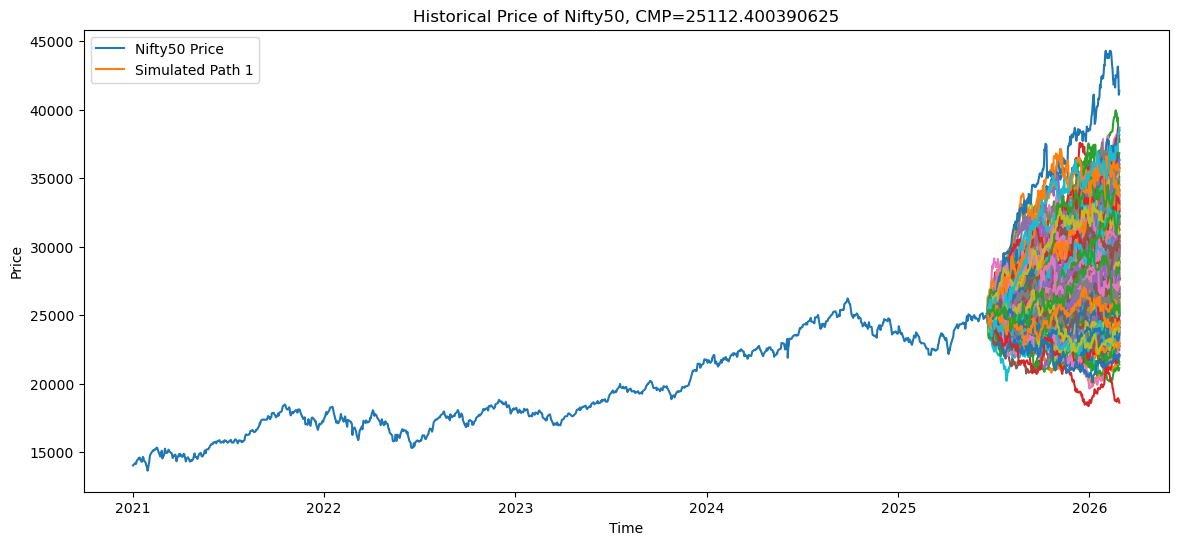

In [95]:
plt.figure(figsize=(14,6))
plt.plot(spotData, label='Nifty50 Price')

for i, path in enumerate(all_simulated_paths):
    plt.plot([spotData.tail(1).index[0]+timedelta(t) for t in range(253)], path, label=f'Simulated Path {i+1}' if i == 0 else "_nolegend_")

plt.title(f'Historical Price of Nifty50, CMP={spotPrice}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [99]:
simulatedPaths = {}
for s in tqdm(range(1, simulatuions+1)):
    simulatedPath = [spotPrice]
    for t in range(252):
        simulatedPrice = simulatedPath[t] * (1 + np.random.choice(spotReturns))
        simulatedPath.append(simulatedPrice)
    simulatedPaths[s] = simulatedPath
simulatedPaths = pd.DataFrame(simulatedPaths, index=[spotData.tail(1).index[0] + timedelta(t) for t in range(253)])
simulatedPaths.round(2)

100%|██████████| 10000/10000 [00:44<00:00, 223.30it/s]


,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
2025-06-20,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,...,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40,25112.40
2025-06-21,25154.44,25018.29,24952.18,25145.53,25187.04,25229.36,25092.85,24979.55,25183.62,25154.99,...,25305.18,25302.03,25028.68,25402.65,25099.59,25178.49,24940.19,25148.99,25207.32,25353.03
2025-06-22,25222.38,25207.24,24835.94,24912.83,24994.69,25499.32,25079.29,25372.89,24657.42,24779.37,...,25059.43,25256.26,24991.76,25338.71,25224.19,24822.94,24908.36,25204.36,25432.78,25366.99
2025-06-23,25307.88,25135.42,24570.07,25322.04,24949.47,25304.58,24841.55,25207.23,24403.41,24844.56,...,25042.91,25141.61,24843.95,25304.63,25287.14,24858.06,24810.66,24998.09,25335.68,25422.85
2025-06-24,25401.63,24936.28,24593.09,25521.82,24922.68,25027.14,24591.37,25412.93,24597.13,24572.51,...,25060.62,25141.99,24834.79,25217.40,25106.26,25294.75,24734.31,25180.99,25453.03,25288.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-23,34976.79,31304.94,25490.85,27792.02,33457.42,21887.62,28317.38,31801.17,24118.68,17792.69,...,24947.53,25565.19,30223.16,28534.88,29199.66,33076.12,29167.87,33360.98,29205.42,30562.22
2026-02-24,34797.55,31298.96,25462.02,27934.76,33322.27,21851.83,28389.96,31623.27,24144.60,17820.27,...,25041.44,25444.42,30149.84,28463.08,29415.96,32800.29,28731.17,32279.00,29123.19,30650.45
2026-02-25,34848.92,31290.82,25916.09,27589.42,33252.24,21560.10,28323.16,31790.38,23960.21,18063.95,...,25264.31,25530.68,30329.38,28459.22,29687.51,32927.86,28195.48,32449.69,29392.49,30877.50
2026-02-26,35091.37,31098.03,26101.30,27914.37,33508.26,21531.45,28452.75,31586.65,24071.19,18002.32,...,25108.65,25341.95,29976.71,28675.79,29594.15,32919.29,27899.71,32518.20,29254.02,30958.76


In [101]:
priceEstimate = simulatedPaths.tail(1).transpose().mean().values[0]
print('Price Estimate :',priceEstimate)

Price Estimate : 28938.46791881181


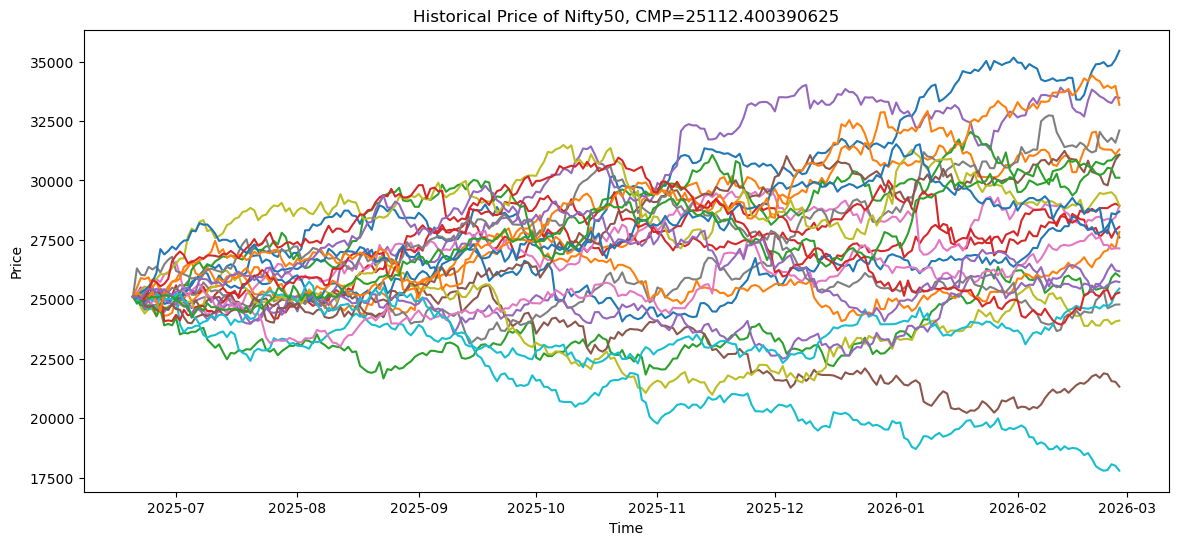

In [111]:
plt.figure(figsize=(14,6))
# plt.plot(spotData, label='Nifty50 Price')

plt.plot(simulatedPaths.iloc[:,:25])

plt.title(f'Historical Price of Nifty50, CMP={spotPrice}')
plt.xlabel('Time')
plt.ylabel('Price')
# plt.legend(loc='upper left')
plt.show()

## Model Devlopment

In [144]:
class PerdictionModel(Returns):

    def __init__(self, data, shockType, simulations, technique, holdingPeriod=1, tradingDays=252):
        super().__init__(data)
        self.spotPrice = self.data.tail(1).values[0]
        self.shockType = shockType
        self.simulations = simulations
        self.technique = technique
        self.holdingPeriod = holdingPeriod
        self.tradingDays = tradingDays

    def HistoricalSimulation(self):
        if self.technique == "Point":

            if self.shockType == 'DISC':
                tsReturns = self.DiscreteProptionalReturns().tail(self.tradingDays)
                sampleReturns = np.random.choice(tsReturns, size=self.simulations)
                simulatedPrices = np.array([self.spotPrice*(1+ret) for ret in sampleReturns])

            if self.shockType == 'DISC':
                tsReturns = self.ContinuousProtionalReturns().tail(self.tradingDays)
                sampleReturns = np.random.choice(tsReturns, size=self.simulations)
                simulatedPrices = np.array([self.spotPrice*np.exp(ret) for ret in sampleReturns])

        elif self.technique == 'Path':

            if self.shockType == 'DISC':
                tsReturns = self.DiscreteProptionalReturns().tail(self.tradingDays)
                simulatedPaths ={}
                
                for s in tqdm(range(self.simulations)):
                    simulatedPath = [spotPrice]

                    for t in range(self.holdingPeriod):
                        simulatedPrice = simulatedPath[t] * (1 + np.random.choice(tsReturns))
                        simulatedPath.append(simulatedPrice)
                    simulatedPaths[s] = simulatedPath
            
            if self.shockType == 'CONT':
                tsReturns = self.DiscreteProptionalReturns().tail(self.tradingDays)
                simulatedPaths ={}
                
                for s in tqdm(range(self.simulations)):
                    simulatedPath = [spotPrice]

                    for t in range(self.holdingPeriod):
                        simulatedPrice = simulatedPath[t] * np.exp(np.random.choice(tsReturns))
                        simulatedPath.append(simulatedPrice)
                    simulatedPaths[s] = simulatedPath
                    
            simulatedPrices = pd.DataFrame(simulatedPaths).tail(1).values

        return np.mean(simulatedPrices)

In [130]:
PerdictionModel(data=spotData,shockType='DISC', simulations=1000000, technique='Point').HistoricalSimulation()

25120.380874205675

In [148]:
PerdictionModel(data=spotData,shockType='DISC', simulations=10000, technique='Path',holdingPeriod=252).HistoricalSimulation()

100%|██████████| 10000/10000 [01:46<00:00, 94.01it/s]


27157.553176601326